In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [ ]:
# Loading the data
data = pd.read_csv("/content/drive/MyDrive/sentimental analysis/amazon_alexa.tsv", delimiter='\t', quoting=3)
print(f"Dataset shape: {data.shape}")


Dataset shape: (3150, 5)


In [ ]:
data.head()
#Feedback 1 means people gives the feedback 0 means people not gives the feedback

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
#columns name
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [ ]:
#check null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
#if any null values
data.dropna(inplace=True)

In [ ]:
#Creating a length column that will contain the length of the verified_reviewas.
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
#Randomly checked 10th record
print(f"'verified_reviews' column value{data.iloc[10]['verified_reviews']}")#orginal value
print(f"length of review : {len(data.iloc[10]['verified_reviews'])}")#length of review using len function
print(f"'length of column' : {data.iloc[10]['length']}") #value of the column length

'verified_reviews' column value"I sent it to my 85 year old Dad, and he talks to it constantly."
length of review : 65
'length of column' : 65


In [ ]:
#data types of feature
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

Analyzing the 'rating columns'

In [ ]:
#Distict values of 'rating' and its count
print(f"ranting value count: \n{data['rating'].value_counts()}")

ranting value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


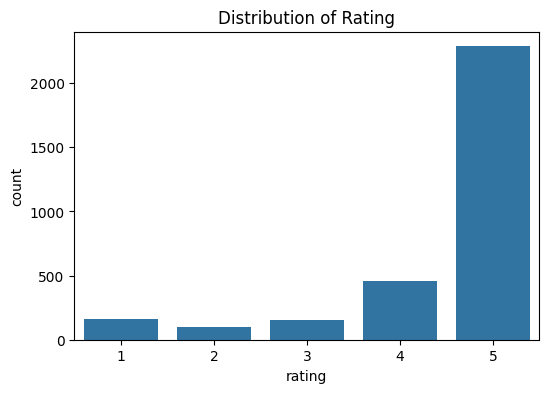

In [ ]:
# Distribution of the rating
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='rating', data=data)
ax.set_title('Distribution of Rating')
plt.show()


In [ ]:
# Give rating distribution percentage

total_reviews = len(data)
rating_counts = data['rating'].value_counts()

for rating, count in rating_counts.items():
  percentage = (count / total_reviews) * 100
  print(f"Rating {rating}: {percentage:.2f}%")


Rating 5: 72.57%
Rating 4: 14.44%
Rating 1: 5.11%
Rating 3: 4.83%
Rating 2: 3.05%


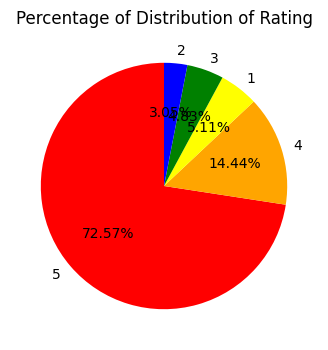

In [ ]:
# prompt: Give the pie chart for percentage of distribution of rating

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['red', 'orange', 'yellow', 'green', 'blue']
ax.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)
ax.set_title('Percentage of Distribution of Rating')
plt.show()


Analyzing the feedback column

In [ ]:
# prompt: #Distict values of 'rating' and its count

print(f"feedback value count: \n{data['feedback'].value_counts()}")


feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


In [ ]:
# prompt: Extracting the 'verified review' value for one record with feedback = 0

data[data['feedback'] == 0]['verified_reviews'].iloc[1]


'Sound is terrible if u want good music too get a bose'

In [ ]:
# prompt: Extracting the 'verified review' value for one record with feedback = 1

data[data['feedback'] == 1]['verified_reviews'].iloc[1]


'Loved it!'

<ipython-input-21-75b7d584731d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feedback_counts.index, y=feedback_counts.values, palette='Set2')


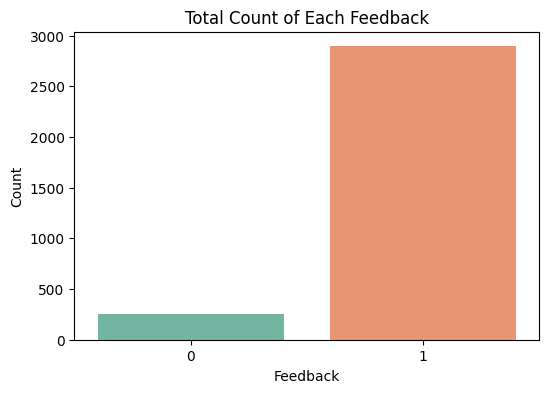

In [ ]:
# prompt: Visualize the  total count of each  feed back using bar graph

import matplotlib.pyplot as plt
feedback_counts = data['feedback'].value_counts()

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=feedback_counts.index, y=feedback_counts.values, palette='Set2')
ax.set_title('Total Count of Each Feedback')
ax.set_xlabel('Feedback')
ax.set_ylabel('Count')
plt.show()
# 0 means negetive feedback
# 1 means positive feed back

In [ ]:
# prompt: Find the percentage distribution of feed back

total_reviews = len(data)
feedback_counts = data['feedback'].value_counts()

for feedback, count in feedback_counts.items():
  percentage = (count / total_reviews) * 100
  print(f"Feedback {feedback}: {percentage:.2f}%")


Feedback 1: 91.84%
Feedback 0: 8.16%


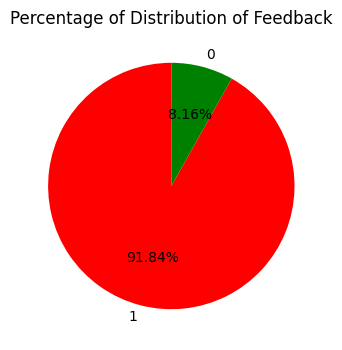

In [ ]:
# prompt: Find the percentage distribution of feed back using pie chart

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['red', 'green']
ax.pie(feedback_counts.values, labels=feedback_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)
ax.set_title('Percentage of Distribution of Feedback')
plt.show()


In [ ]:
# prompt: Feedback 0 value counts on rating

feedback_0_counts = data[data['feedback'] == 0]['rating'].value_counts()
print(feedback_0_counts)


1    161
2     96
Name: rating, dtype: int64


In [ ]:
# prompt: feedback 1 value counts on rating

feedback_1_counts = data[data['feedback'] == 1]['rating'].value_counts()
print(feedback_1_counts)


5    2286
4     455
3     152
Name: rating, dtype: int64


Analyzing the 'variation' column

In [ ]:
# prompt: Distict values variation column count

variation_counts = data['variation'].value_counts()
print(variation_counts)


Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


<ipython-input-27-43925309a9aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variation_counts.index, y=variation_counts.values, palette='Set3')


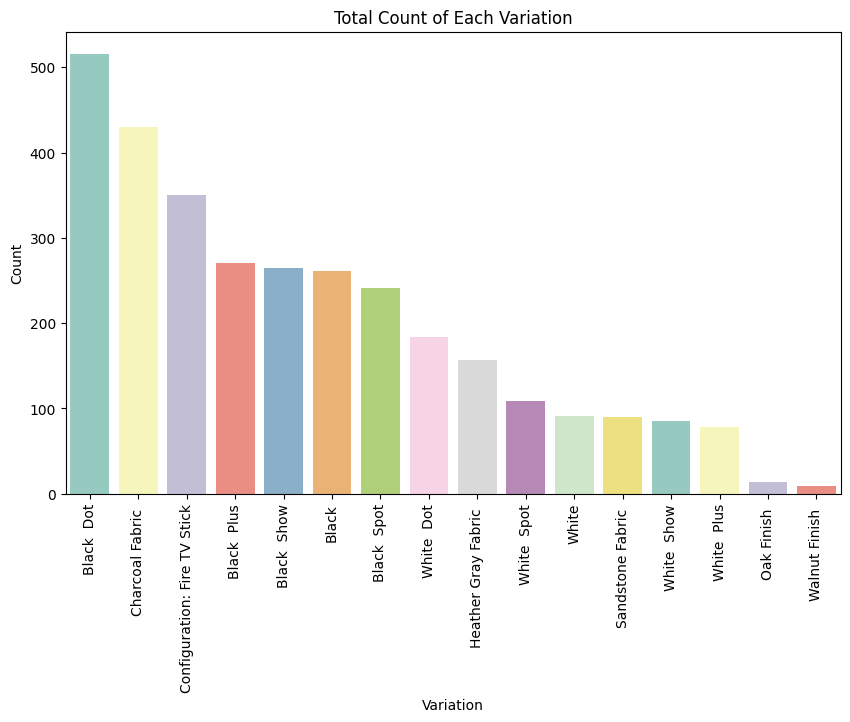

In [ ]:
# prompt:  Distict values variation column count give in a bar graph

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=variation_counts.index, y=variation_counts.values, palette='Set3')
ax.set_title('Total Count of Each Variation')
ax.set_xlabel('Variation')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# prompt:  Distict values variation column count in prcentage

total_variations = len(data)
variation_counts = data['variation'].value_counts()

for variation, count in variation_counts.items():
  percentage = (count / total_variations) * 100
  print(f"Variation {variation}: {percentage:.2f}%")


Variation Black  Dot: 16.38%
Variation Charcoal Fabric : 13.65%
Variation Configuration: Fire TV Stick: 11.11%
Variation Black  Plus: 8.57%
Variation Black  Show: 8.41%
Variation Black: 8.29%
Variation Black  Spot: 7.65%
Variation White  Dot: 5.84%
Variation Heather Gray Fabric : 4.98%
Variation White  Spot: 3.46%
Variation White: 2.89%
Variation Sandstone Fabric : 2.86%
Variation White  Show: 2.70%
Variation White  Plus: 2.48%
Variation Oak Finish : 0.44%
Variation Walnut Finish : 0.29%


In [ ]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)

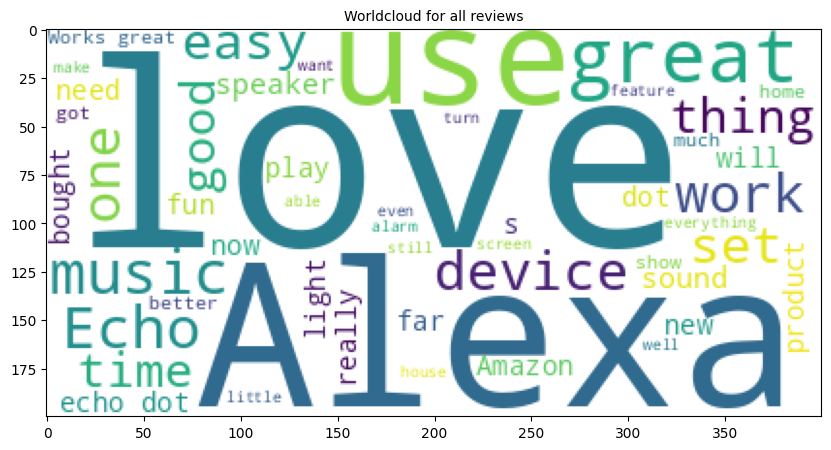

In [ ]:
#Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

#intiaize word(cloud object
wc = WordCloud(background_color = 'white', max_words = 50)

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Worldcloud for all reviews', fontsize=10)
plt.show()

In [ ]:
# prompt: combine all review for each feedback category and splitting them into individual words

positive_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
negative_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])

positive_words = positive_reviews.split()
negative_words = negative_reviews.split()

all_words = positive_words + negative_words


In [ ]:
# prompt: finding words from reviews which are present in that feedback category only

# Create a dictionary to store the count of each word for each feedback category
word_counts = {}
for feedback in [0, 1]:
  word_counts[feedback] = {}
  for word in all_words:
    word_counts[feedback][word] = 0

# Count the occurrences of each word for each feedback category
for i, row in data.iterrows():
  feedback = row['feedback']
  words = row['verified_reviews'].split()
  for word in words:
    word_counts[feedback][word] += 1

# Find the words that are present in only one feedback category
unique_words = {}
for feedback in [0, 1]:
  unique_words[feedback] = set()
  for word, count in word_counts[feedback].items():
    if count > 0 and word not in word_counts[1 - feedback]:
      unique_words[feedback].add(word)

# Print the unique words for each feedback category
for feedback in [0, 1]:
  print(f"Unique words for feedback {feedback}:")
  for word in unique_words[feedback]:
    print(word)


Unique words for feedback 0:
Unique words for feedback 1:


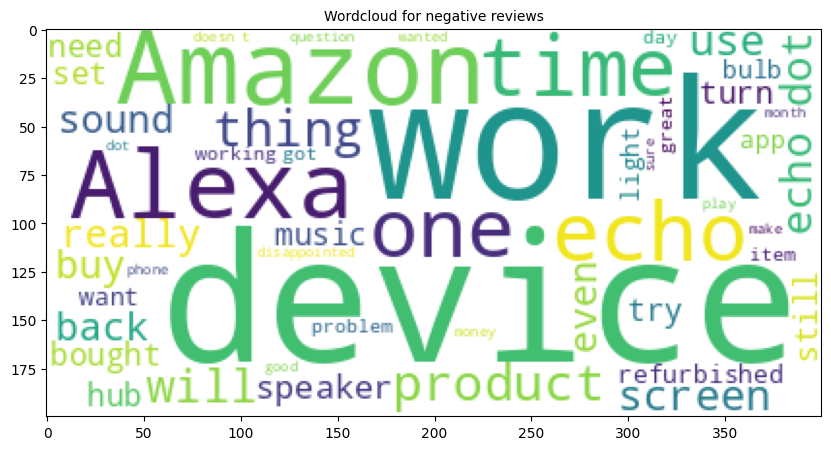

In [ ]:
# prompt: Generate and plot wordcloud unique negetive review

import matplotlib.pyplot as plt
# Create a word cloud for negative reviews
negative_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
negative_wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10, 10))
plt.imshow(negative_wc.generate(negative_reviews))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.show()


Preprocessing and Model building
To build tge corpus from the 'verified_reviews' we perform the fallowing.

1. Replace any non alphabet character with a space.
2. Convert to lower case and split into words.
3. iterate over the individul words and it is not a stopward then add the stemmed form of the word to the corpus.

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]','', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ''.join(review)
  corpus.append(review)

In [ ]:
cv = CountVectorizer(max_features = 2500)

In [ ]:
# prompt: Storing independent and dependent variable in x and y

x = cv.fit_transform(corpus).toarray()
y = data['feedback'].values


In [ ]:
# prompt: saving the count vectorizer

import pickle

# Save the CountVectorizer object to a file
with open('/content/drive/MyDrive/sentimental analysis/count_vectorizer.pkl', 'wb') as f:
  pickle.dump(cv, f)

print("CountVectorizer object saved successfully!")


CountVectorizer object saved successfully!


In [ ]:
# prompt: checking the x and y shape

print(f"X shape: {x.shape}")
print(f"Y shape: {y.shape}")


X shape: (3150, 2234)
Y shape: (3150,)


In [ ]:
# prompt: splitting the data into train and test set with 30% data with testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")
print(f"Y train shape: {y_train.shape}")
print(f"Y test shape: {y_test.shape}")


X train shape: (2205, 2234)
X test shape: (945, 2234)
Y train shape: (2205,)
Y test shape: (945,)


In [ ]:
# prompt: print the x train and x test max value

print(f"X train max value: {x_train.max()}")
print(f"X test max value: {x_test.max()}")


X train max value: 1
X test max value: 1


In [ ]:
# prompt: scale x train and x test so  that the all values are between 0 and 1

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# prompt: saving the scaler model

import pickle

# Save the MinMaxScaler object to a file
with open('/content/drive/MyDrive/sentimental analysis/minmax_scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)

print("MinMaxScaler object saved successfully!")


MinMaxScaler object saved successfully!


Random forest classifier

In [ ]:
# prompt: fitting scaled x train and y train on random forest classifier

mdl_rf = RandomForestClassifier()
mdl_rf.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
# prompt: print accuracy of he model on training and testing data

y_pred_train = mdl_rf.predict(x_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")

y_pred_test = mdl_rf.predict(x_test)
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_test)}")


Training Accuracy: 0.9945578231292517
Testing Accuracy: 0.9343915343915344


In [ ]:
# prompt: predicting on the test set

y_pred = mdl_rf.predict(x_test)


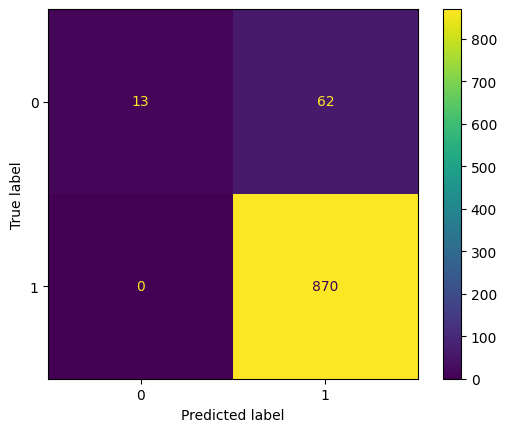

In [ ]:
# prompt: confusion matrix

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl_rf.classes_)
disp.plot()
plt.show()


In [ ]:
# prompt: apllay k fold cross validation

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(mdl_rf, x, y, cv=kfold)

print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean():.4f}")


Cross-validation scores: [0.93492063 0.93492063 0.91904762 0.91746032 0.91746032]
Average cross-validation score: 0.9248


In [ ]:
# prompt: pass parameters  and print  cross validation mean accuracy  on trainset print cross validation mean accuracy on test set and print accuracy score for test set

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=mdl_rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Print the cross-validation mean accuracy on the train set
print("Cross-validation mean accuracy on train set:", grid_search.best_score_)

# Predict the labels on the test set
y_pred_test = grid_search.predict(x_test)

# Print the cross-validation mean accuracy on the test set
print("Cross-validation mean accuracy on test set:", accuracy_score(y_test, y_pred_test))

# Print the accuracy score for the test set
print("Accuracy score for test set:", accuracy_score(y_test, y_pred_test))


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation mean accuracy on train set: 0.9292517006802721
Cross-validation mean accuracy on test set: 0.9343915343915344
Accuracy score for test set: 0.9343915343915344


XgBoost

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prompt: print Accuracy of the model on training and testing data

print("Training Accuracy:", model_xgb.score(x_train, y_train))
print("Testing Accuracy:", model_xgb.score(x_test, y_test))


Training Accuracy: 0.9174603174603174
Testing Accuracy: 0.9206349206349206


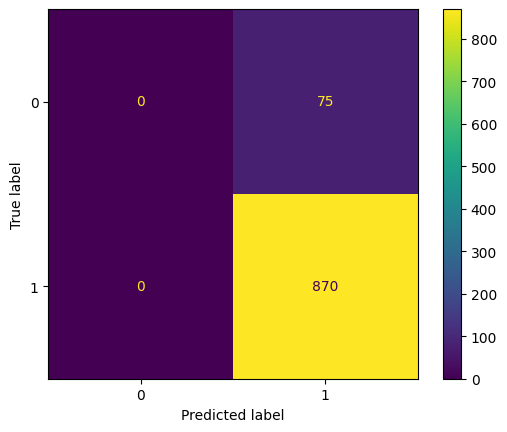

In [ ]:
# prompt: confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels on the test set
y_pred_test = model_xgb.predict(x_test)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot()
plt.show()


In [ ]:
# prompt: saving the xgboost classifier

import pickle

# Save the XGBClassifier model to a file
with open('/content/drive/MyDrive/sentimental analysis/xgboost_model.pkl', 'wb') as f:
  pickle.dump(model_xgb, f)

print("XGBClassifier model saved successfully!")


XGBClassifier model saved successfully!


Decison tree clssifier

In [ ]:
model_dt = DecisionTreeClassifier()

In [ ]:
# prompt: fit model_dt

model_dt.fit(x_train, y_train)


DecisionTreeClassifier()

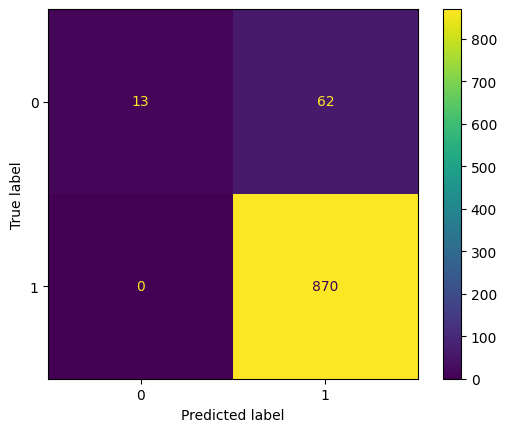

In [ ]:
# Predict the labels on the test set
y_pred_test = model_dt.predict(x_test)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()
plt.show()

In [ ]:
# prompt: accuracy of the model on training and test data

print(f"Training Accuracy: {accuracy_score(y_train, mdl_rf.predict(x_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, mdl_rf.predict(x_test))}")


Training Accuracy: 0.9945578231292517
Testing Accuracy: 0.9343915343915344


In [ ]:
# Save the DecisionTreeClassifier model to a file
with open('/content/drive/MyDrive/sentimental analysis/decision_tree_model.pkl', 'wb') as f:
  pickle.dump(model_dt, f)

print("DecisionTreeClassifier model saved successfully!")



DecisionTreeClassifier model saved successfully!
